# LOGISTIC REGRESSION

# 1. Data Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

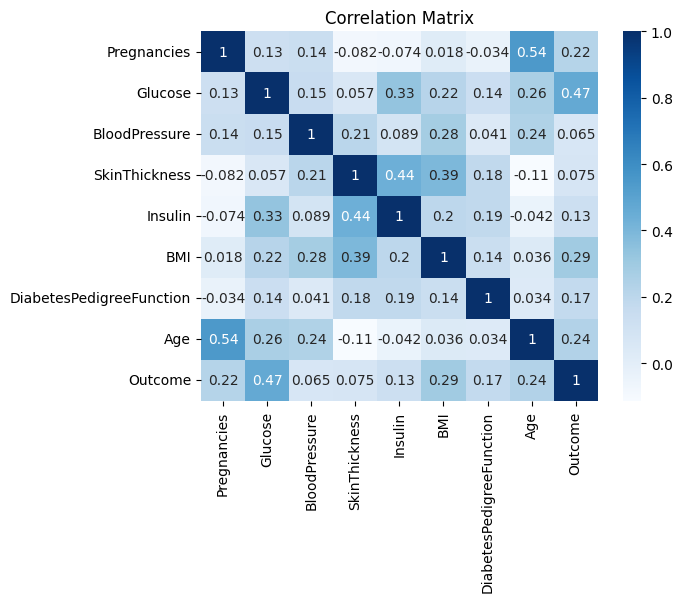

In [1]:
import pandas as pd
import numpy as np
import warnings

# Suppress warnings for clean output
warnings.filterwarnings("ignore", category=RuntimeWarning)
np.seterr(divide='ignore', invalid='ignore', over='ignore')

# Load the data
df = pd.read_csv("/Users/reddyharshayadhav/Downloads/diabete.csv")

# Basic info and summary
print(df.info())
print(df.describe())
print("Class distribution:\n", df['Outcome'].value_counts())

# Correlation matrix (visualization)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

# 2. Data Preprocessing

In [2]:
# Replace zeros in key medical columns with NaN (cannot be zero)
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    df[col] = df[col].replace(0, np.nan)

# Impute missing values with each column's median
df.fillna(df.median(), inplace=True)

# Remove constant columns if any
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
cols_to_drop = [col for col in X.columns if X[col].nunique() == 1]
X = X.drop(cols_to_drop, axis=1)

# 3. Model Building

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model Evaluation:

Accuracy : 0.6948051948051948
Precision: 0.574468085106383
Recall   : 0.5
F1 Score : 0.5346534653465347
ROC AUC  : 0.8127777777777777
Confusion Matrix:
 [[80 20]
 [27 27]]


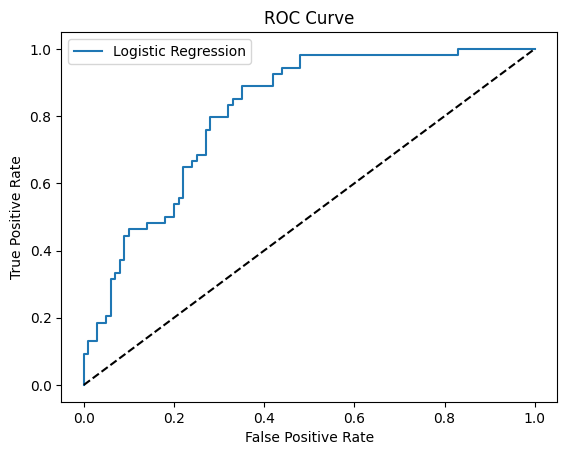

In [4]:
from sklearn.linear_model import LogisticRegression

# Build and train model (using liblinear solver for best stability)
model = LogisticRegression(max_iter=200, solver='liblinear')
model.fit(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Predict/results
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC AUC  :", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 5. Interpretation:

In [5]:
coefs = pd.Series(model.coef_[0], index=X.columns)
print("Feature importances (absolute magnitude):")
print(coefs.abs().sort_values(ascending=False))

Feature importances (absolute magnitude):
Glucose                     1.180614
BMI                         0.687247
Pregnancies                 0.376536
DiabetesPedigreeFunction    0.233195
Age                         0.147300
Insulin                     0.066171
BloodPressure               0.043986
SkinThickness               0.027302
dtype: float64


# 6. Deployment With Streamlit 

In [6]:
import joblib
joblib.dump(model, "logreg_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

Creat app.py file and write the code in that file

Now in the teriminal type streamlit run app.py and press  enter it will take to web browswer